In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset
import ast

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)  

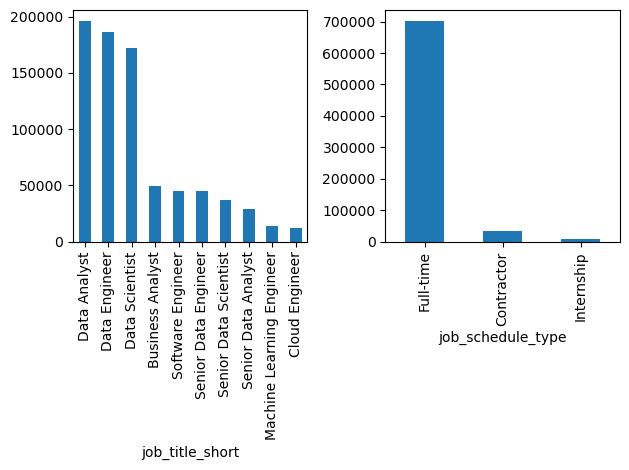

In [2]:
fig, ax = plt.subplots(1,2)

df['job_title_short'].value_counts().plot(kind='bar',ax=ax[0])
df['job_schedule_type'].value_counts().head(3).plot(kind='bar',ax=ax[1])

fig.tight_layout()

In [3]:
df_skills = df.copy()
df_skills = df_skills.explode('job_skills')
skills_count = df_skills.groupby(['job_title_short','job_skills']).size()
df_skills_count = skills_count.reset_index(name='skill_count')
df_skills_count.sort_values(by='skill_count',ascending=False,inplace=True)

df_skills_count[df_skills_count['job_title_short'] == 'Data Scientist']

,job_title_short,job_skills,skill_count
1066,Data Scientist,python,113711
1101,Data Scientist,sql,78982
1070,Data Scientist,r,59566
1082,Data Scientist,sas,29534
1113,Data Scientist,tableau,29445
...,...,...,...
1020,Data Scientist,mattermost,1
1042,Data Scientist,nuxt.js,1
1137,Data Scientist,wimi,1
1091,Data Scientist,shogun,1


In [4]:
job_titles = ['Data Scientist', 'Data Analyst','Data Engineer']

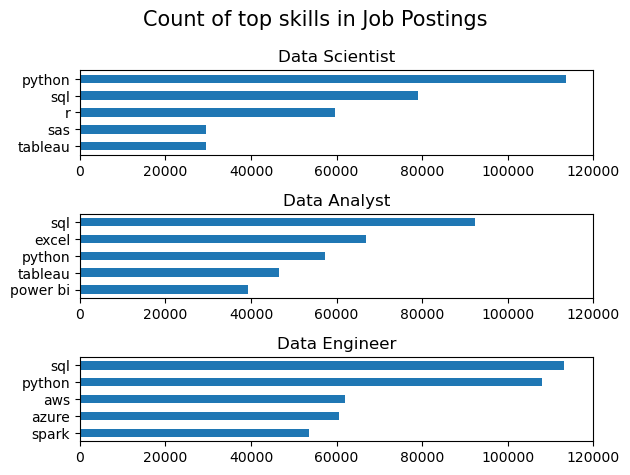

In [5]:
fig, ax = plt.subplots(3,1)

for i,title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == title].head(5)
    df_plot.plot(kind='barh',x='job_skills',y='skill_count',ax=ax[i], title=title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)
    ax[i].set_xlim(0,120000)

fig.suptitle('Count of top skills in Job Postings',fontsize=15)    
fig.tight_layout()


job_title_short
Data Analyst      196075
Data Engineer     186241
Data Scientist    172286
Name: count, dtype: int64

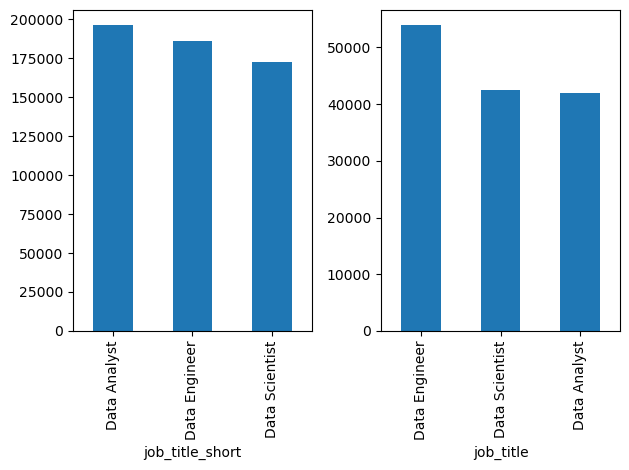

In [9]:
fig, ax = plt.subplots(1,2)

df['job_title_short'].value_counts().head(3).plot(kind='bar',ax=ax[0])
df['job_title'].value_counts().head(3).plot(kind='bar',ax=ax[1])

fig.tight_layout()
